In [2]:
import pandas as pd
from scipy.stats import rankdata
import numpy as np

In [3]:
url = 'https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv'
df = pd.read_csv(url)
df.head() 

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [4]:
old = df[df['age'] >= 40]['charges'].reset_index(drop=True)
young = df[df['age'] < 40]['charges'].reset_index(drop=True)

combined_df = pd.DataFrame({
    'Старше 40': old,
    'Младше 40': young
})

combined_df.head(15)




,Старше 40,Младше 40
0,8240.58960,16884.92400
1,28923.13692,1725.55230
2,27808.72510,4449.46200
3,11090.71780,21984.47061
4,10797.33620,3866.85520
5,10602.38500,3756.62160
6,13228.84695,7281.50560
7,14001.13380,6406.41070
8,14451.83515,2721.32080
9,12268.63225,1826.84300


In [5]:
print(old.shape)
print(young.shape)

(664,)
(674,)


Количество людей младше 40 лет: 674
Количество людей старше 40 лет: 664


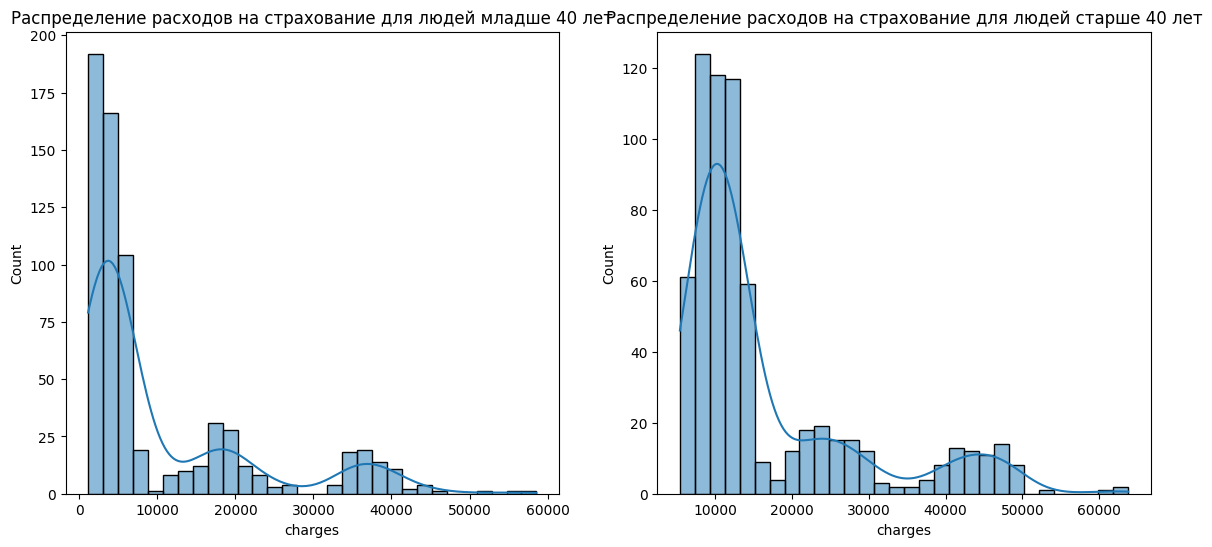

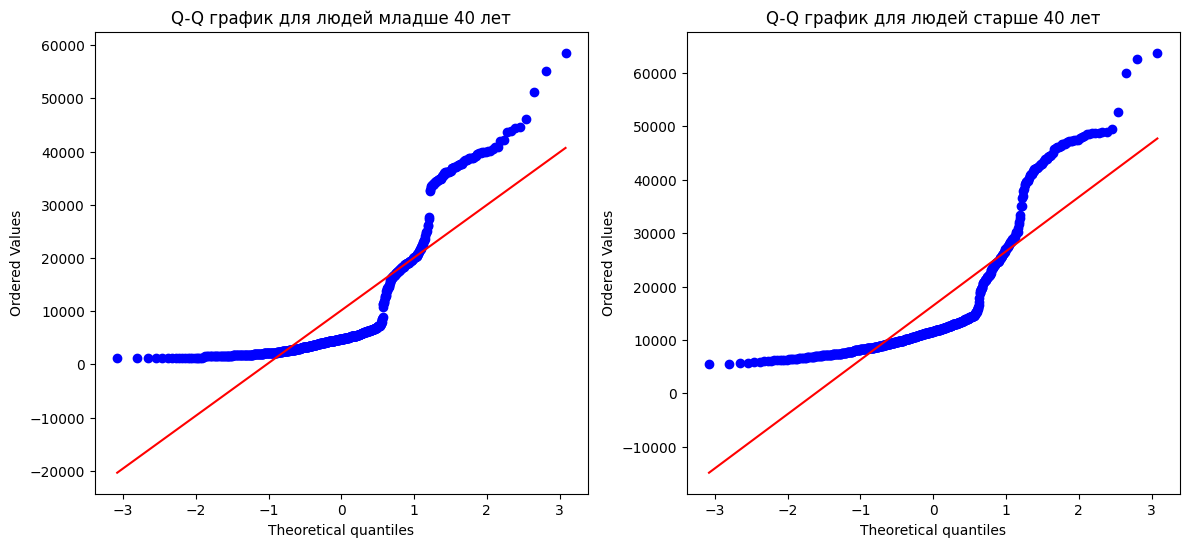

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

older_than_40 = df[df['age'] >= 40]['charges'].reset_index(drop=True)
younger_than_40 = df[df['age'] < 40]['charges'].reset_index(drop=True)

print("Количество людей младше 40 лет:", younger_than_40.shape[0])
print("Количество людей старше 40 лет:", older_than_40.shape[0])

combined_df = pd.DataFrame({
    'Younger than 40': younger_than_40,
    'Older than 40': older_than_40
})

fig, axes = plt.subplots(1, 2, figsize=(14, 6))

sns.histplot(younger_than_40, bins=30, kde=True, ax=axes[0])
axes[0].set_title('Распределение расходов на страхование для людей младше 40 лет')

sns.histplot(older_than_40, bins=30, kde=True, ax=axes[1])
axes[1].set_title('Распределение расходов на страхование для людей старше 40 лет')

plt.show()

fig, axes = plt.subplots(1, 2, figsize=(14, 6))

stats.probplot(younger_than_40, dist="norm", plot=axes[0])

axes[0].set_title('Q-Q график для людей младше 40 лет')

stats.probplot(older_than_40, dist="norm", plot=axes[1])
axes[1].set_title('Q-Q график для людей старше 40 лет')

plt.show()


## Критерий Вилкоконса 

In [21]:
# Слияние двух выборок
all_data = np.concatenate([younger_than_40, older_than_40])

# Ранжирование объединенных данных 
ranks = rankdata(all_data)
print(sorted(ranks))

[1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 11.0, 12.0, 13.0, 14.0, 15.0, 16.0, 17.0, 18.0, 19.0, 20.0, 21.0, 22.0, 23.0, 24.0, 25.0, 26.0, 27.0, 28.0, 29.0, 30.0, 31.0, 32.0, 33.0, 34.0, 35.0, 36.0, 37.0, 38.0, 39.0, 40.0, 41.0, 42.5, 42.5, 44.0, 45.0, 46.0, 47.0, 48.0, 49.0, 50.0, 51.0, 52.0, 53.0, 54.0, 55.0, 56.0, 57.0, 58.0, 59.0, 60.0, 61.0, 62.0, 63.0, 64.0, 65.0, 66.0, 67.0, 68.0, 69.0, 70.0, 71.0, 72.0, 73.0, 74.0, 75.0, 76.0, 77.0, 78.0, 79.0, 80.0, 81.0, 82.0, 83.0, 84.0, 85.0, 86.0, 87.0, 88.0, 89.0, 90.0, 91.0, 92.0, 93.0, 94.0, 95.0, 96.0, 97.0, 98.0, 99.0, 100.0, 101.0, 102.0, 103.0, 104.0, 105.0, 106.0, 107.0, 108.0, 109.0, 110.0, 111.0, 112.0, 113.0, 114.0, 115.0, 116.0, 117.0, 118.0, 119.0, 120.0, 121.0, 122.0, 123.0, 124.0, 125.0, 126.0, 127.0, 128.0, 129.0, 130.0, 131.0, 132.0, 133.0, 134.0, 135.0, 136.0, 137.0, 138.0, 139.0, 140.0, 141.0, 142.0, 143.0, 144.0, 145.0, 146.0, 147.0, 148.0, 149.0, 150.0, 151.0, 152.0, 153.0, 154.0, 155.0, 156.0, 157.0, 158.0, 1

In [26]:
ranks_younger = ranks[:len(younger_than_40)]
ranks_older = ranks[len(older_than_40):]

# Сумма рангов для каждой группы
sum_ranks_younger = np.sum(ranks_younger)
sum_ranks_older = np.sum(ranks_older)

# print(ranks_older)
print(sum_ranks_older)

569063.0


In [7]:


ranks_younger = ranks[:len(younger_than_40)]
ranks_older = ranks[len(older_than_40):]

# Сумма рангов для каждой группы
sum_ranks_younger = np.sum(ranks_younger)
sum_ranks_older = np.sum(ranks_older)

# Минимальная сумма рангов
W = min(sum_ranks_younger, sum_ranks_older)

# Размеры выборок
n1 = len(younger_than_40)
n2 = len(older_than_40)

# Расчёт ожидаемого значения и дисперсии
E_W = n1 * (n1 + n2 + 1) / 2
Var_W = n1 * n2 * (n1 + n2 + 1) / 12

# Вычисление z-статистики
z = (W - E_W) / np.sqrt(Var_W)

# Вывод результатов
print(f"Сумма рангов младшей группы: {sum_ranks_younger}")
print(f"Сумма рангов старшей группы: {sum_ranks_older}")
print(f"W-статистика: {W}")
print(f"Ожидаемое значение W: {E_W}")
print(f"Дисперсия W: {Var_W}")
print(f"z-статистика: {z}")

# Проверка против критического значения на уровне значимости 0.05
# Для двустороннего теста используйте z-критическое значение 1.96 (или найдите в таблице нормального распределения)
if abs(z) > 1.96:
    print("Отвергаем нулевую гипотезу: средние расходы статистически различаются.")
else:
    print("Не отвергаем нулевую гипотезу: нет достаточных доказательств различия средних расходов.")


Сумма рангов младшей группы: 331101.0
Сумма рангов старшей группы: 569063.0
W-статистика: 331101.0
Ожидаемое значение W: 451243.0
Дисперсия W: 49937558.666666664
z-статистика: -17.00126371320846
Отвергаем нулевую гипотезу: средние расходы статистически различаются.
